In [1]:
import numpy as np  
import matplotlib.pyplot as plt
from param_est import OnlineParamEst
import importlib

In [2]:
param_est = OnlineParamEst()
np.random.seed(7)
# 1) Run both simulations
x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_hover_with_DEKA(NSIM=200)
print("finished DEKA simulation")

finished DEKA simulation


In [3]:
x_rls,  u_rls,  theta_rls,  theta_hat_rls  = param_est.simulate_quadrotor_hover_with_RLS(NSIM=200)
print("finished RLS simulation")

finished RLS simulation


In [4]:
Q = 1e-6 * np.eye(7)
R = 1e-6 * np.eye(6*10)
x_kf,  u_kf,  theta_kf,  theta_hat_kf  = param_est.simulate_quadrotor_hover_with_KF(NSIM=200, Q_noise=Q, R_noise=R)
print("finished KF simulation")
# x_mpc,  u_mpc,  theta_mpc,  theta_hat_mpc  = param_est.simulate_quadrotor_hover_with_no_estimation()
# print("finished naive mpc simulation")


finished KF simulation


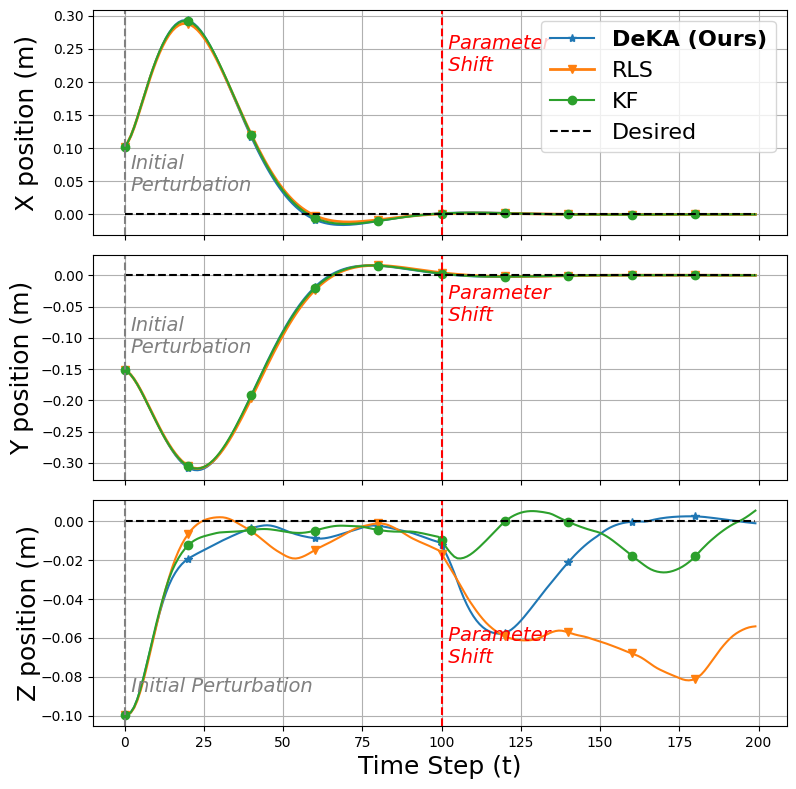

In [5]:
t = np.arange(200)  # time steps 0..N-1

x_pos_deka  = [row[0] for row in x_deka]
x_pos_rls   = [row[0] for row in x_rls]
x_pos_kf   = [row[0] for row in x_kf]

y_pos_deka  = [row[1] for row in x_deka]
y_pos_rls   = [row[1] for row in x_rls]
y_pos_kf   = [row[1] for row in x_kf]

z_pos_deka  = [row[2] for row in x_deka]
z_pos_rls   = [row[2] for row in x_rls]
z_pos_kf   = [row[2] for row in x_kf]

hov_goal_xyz = np.linspace(0,0,200)

theta_hat_deka_array = np.array(theta_hat_deka)
theta_deka_array = np.array(theta_deka)
theta_hat_rls_array = np.array(theta_hat_rls)
theta_rls_array = np.array(theta_rls)
theta_hat_ekf_array = np.array(theta_hat_kf)
theta_ekf_array = np.array(theta_kf)

hov_des = np.zeros_like(x_pos_deka)


import numpy as np
import matplotlib.pyplot as plt

# Create one figure with three subplots (stacked vertically)
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)
# fig.suptitle('Quadrotor Position Tracking', fontsize=20, fontweight='bold')

# Define colors for better distinction
colors = {
    'deka': 'tab:blue',
    'rls': 'tab:orange',
    'kf': 'tab:green',
    'desired': 'black',
    'parameter_shift': 'red',
    'initial_perturbation': 'gray'
}

# X position
axs[0].plot(t, x_pos_deka, marker="*", markevery=20, color=colors['deka'], label='DEKA')
axs[0].plot(t, x_pos_rls, marker="v", markevery=20, color=colors['rls'], label='RLS', linewidth=2)
axs[0].plot(t, x_pos_kf, marker="o", markevery=20, color=colors['kf'], label='KF', linewidth=1.5)
axs[0].plot(t, hov_goal_xyz, color=colors['desired'], linestyle='--', label='Desired')

axs[0].axvline(x=100, color=colors['parameter_shift'], linestyle='--', label='Parameter Shift')
axs[0].axvline(x=0, color=colors['initial_perturbation'], linestyle='--', label='Initial Perturbation')

# Add vertical line labels
axs[0].text(100, 0.21, ' Parameter\n Shift', color=colors['parameter_shift'], verticalalignment='bottom', fontsize=14, fontstyle='italic')
axs[0].text(2, 0.03, 'Initial\nPerturbation', color=colors['initial_perturbation'], verticalalignment='bottom', fontsize=14, fontstyle='italic')

axs[0].set_ylabel('X position (m)', fontsize=18, labelpad=10)
# axs[0].set_yscale("symlog", linthresh=0.01)  # Set threshold for linear region near zero
axs[0].grid(True)
# for text in axs[0].legend().get_texts():
#     if "DeKA (Ours)" in text.get_text():
#         text.set_weight("bold")  # Bold the text

# Y position
axs[1].plot(t, y_pos_deka, marker="*", markevery=20, color=colors['deka'])
axs[1].plot(t, y_pos_rls, marker="v", markevery=20, color=colors['rls'], linewidth=2)
axs[1].plot(t, y_pos_kf, marker="o", markevery=20, color=colors['kf'], linewidth=1.5)
axs[1].plot(t, hov_goal_xyz, color=colors['desired'], linestyle='--')

axs[1].axvline(x=100, color=colors['parameter_shift'], linestyle='--')
axs[1].axvline(x=0, color=colors['initial_perturbation'], linestyle='--')

axs[1].text(100, -0.08, ' Parameter\n Shift', color=colors['parameter_shift'], verticalalignment='bottom', fontsize=14, fontstyle='italic')
axs[1].text(2, -0.13, 'Initial\nPerturbation', color=colors['initial_perturbation'], verticalalignment='bottom', fontsize=14, fontstyle='italic')

axs[1].set_ylabel('Y position (m)', fontsize=18 , labelpad=5)
# axs[1].set_yscale("symlog", linthresh=0.01)
axs[1].grid(True)

# Z position
axs[2].plot(t, z_pos_deka, marker="*", markevery=20, color=colors['deka'])
axs[2].plot(t, z_pos_rls, marker="v", markevery=20, color=colors['rls'])
axs[2].plot(t, z_pos_kf, marker="o", markevery=20, color=colors['kf'])
axs[2].plot(t, hov_goal_xyz, color=colors['desired'], linestyle='--')

axs[2].axvline(x=100, color=colors['parameter_shift'], linestyle='--')
axs[2].axvline(x=0, color=colors['initial_perturbation'], linestyle='--')

axs[2].text(100, -0.075, ' Parameter\n Shift', color=colors['parameter_shift'], verticalalignment='bottom', fontsize=14, fontstyle='italic')
axs[2].text(0, -0.09, ' Initial Perturbation', color=colors['initial_perturbation'], verticalalignment='bottom', fontsize=14, fontstyle='italic')

axs[2].set_xlabel('Time Step (t)', fontsize=18)
axs[2].set_ylabel('Z position (m)', fontsize=18, labelpad=0)
# axs[2].set_yscale("symlog", linthresh=0.01)
axs[2].grid(True)

# Create a single legend outside the subplots
# fig.legend(['DeKA(Ours)', 'RLS', 'KF', 'Desired'], fontsize=16, loc='upper right', bbox_to_anchor=(1.0, 1.0), bbox_transform=axs[0].transAxes)
fig.legend(['DeKA (Ours)', 'RLS', 'KF', 'Desired'], fontsize=16, loc='upper right', bbox_to_anchor=(1.0, 1.0), bbox_transform=axs[0].transAxes).get_texts()[0].set_weight("bold")  # Make first label bold
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()


In [6]:
# import pandas as pd
# import numpy as np

# # Create a dictionary with column names and data
# data = {
#     "time": t,
#     "x_pos_deka": x_pos_deka,
#     "x_pos_rls": x_pos_rls,
#     "x_pos_kf": x_pos_kf,
#     "y_pos_deka": y_pos_deka,
#     "y_pos_rls": y_pos_rls,
#     "y_pos_kf": y_pos_kf,
#     "z_pos_deka": z_pos_deka,
#     "z_pos_rls": z_pos_rls,
#     "z_pos_kf": z_pos_kf,
#     "hov_goal_xyz": hov_goal_xyz,
#     "hov_des": hov_des
# }

# # Convert to DataFrame
# df = pd.DataFrame(data)

# # Save to CSV
# columns = ["theta_hat_deka_" + str(i) for i in range(7)] + \
#           ["theta_deka_" + str(i) for i in range(7)] + \
#           ["theta_hat_rls_" + str(i) for i in range(7)] + \
#           ["theta_rls_" + str(i) for i in range(7)] + \
#           ["theta_hat_ekf_" + str(i) for i in range(7)] + \
#           ["theta_ekf_" + str(i) for i in range(7)]

# # Stack arrays horizontally (column-wise)
# theta_combined = np.hstack([
#     theta_hat_deka_array, theta_deka_array,
#     theta_hat_rls_array, theta_rls_array,
#     theta_hat_ekf_array, theta_ekf_array
# ])

# # Convert to DataFrame
# df = pd.DataFrame(theta_combined, columns=columns)

# # Save to CSV
# df.to_csv("theta_data.csv", index=False)

# print("CSV file saved successfully!")



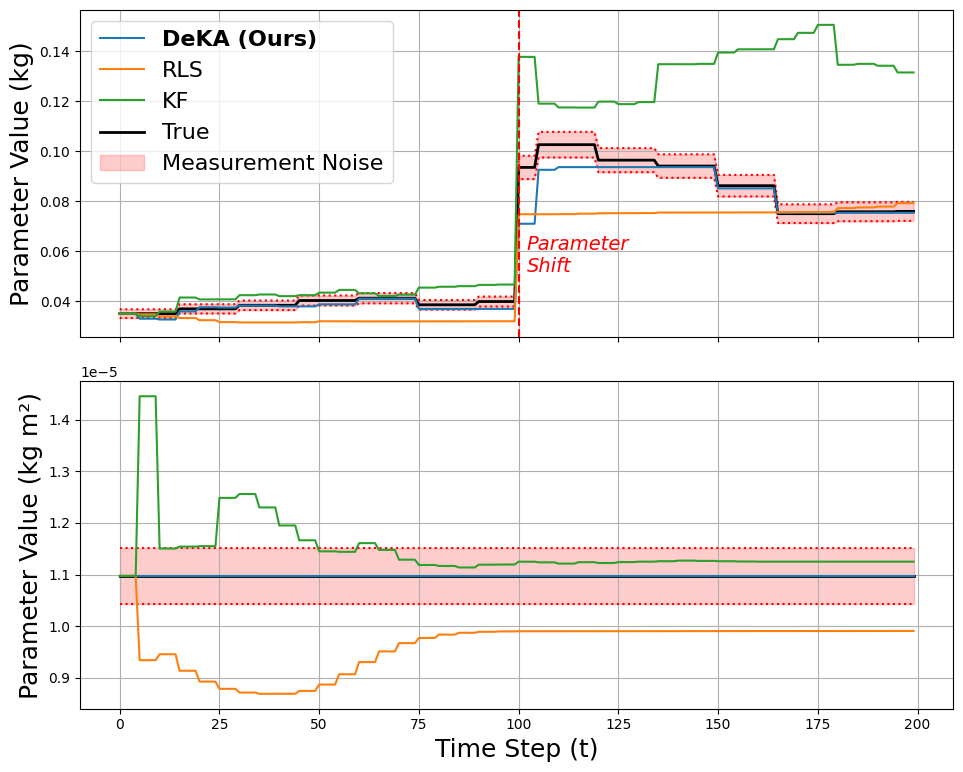

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define consistent colors
colors = {
    'deka': 'tab:blue',
    'rls': 'tab:orange',
    'kf': 'tab:green',
    'true': 'black',
    'noise_region': 'red',
    'noise_bound': 'red',
    'parameter_shift': 'red',
}

# Create one figure with two subplots (stacked vertically)
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# ---------------------------
# Subplot 1: Parameter 0 (shifted parameter)
# ---------------------------

# Compute the noise bounds (5% above and below)
theta_deka_upper = theta_deka_array[:, 0] * 1.05
theta_deka_lower = theta_deka_array[:, 0] * 0.95

# Fill the region for measurement noise in light red
axs[0].fill_between(t, theta_deka_lower, theta_deka_upper, color=colors['noise_region'], alpha=0.2, label='Measurement Noise')

# Plot the noise bounds as red dotted lines
axs[0].plot(t, theta_deka_upper, color=colors['noise_bound'], linestyle=':')
axs[0].plot(t, theta_deka_lower, color=colors['noise_bound'], linestyle=':')

# Plot the true parameter in solid black
axs[0].plot(t, theta_deka_array[:, 0], color=colors['true'], linestyle='-', linewidth=2, label='True')

# Plot the estimated parameters with consistent colors
axs[0].plot(t, theta_hat_deka_array[:, 0], color=colors['deka'], label='DeKA (Ours)')
axs[0].plot(t, theta_hat_rls_array[:, 0], color=colors['rls'], label='RLS')
axs[0].plot(t, theta_hat_ekf_array[:, 0], color=colors['kf'], label='KF')
axs[0].axvline(x=100, color=colors['parameter_shift'], linestyle='--')
axs[0].text(102, 0.05, 'Parameter\nShift', color=colors['parameter_shift'], verticalalignment='bottom', fontsize=14, fontstyle='italic')

# axs[0].set_title('Perturbed Parameter Estimation', fontsize=20, fontweight='bold')
axs[0].set_ylabel('Parameter Value (kg)', fontsize=18)
axs[0].legend(fontsize=16)
axs[0].grid(True)

# Get the legend handles and labels
handles, labels = axs[0].get_legend_handles_labels()

# Define a custom order (Modify the order as needed)
custom_order = ["DeKA (Ours)", "RLS", "KF", "True", "Measurement Noise"]  # Example order

# Reorder the handles and labels
sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: custom_order.index(x[1]) if x[1] in custom_order else len(custom_order))
handles, labels = zip(*sorted_handles_labels)

# Set the legend with the new order
legend = axs[0].legend(handles, labels, fontsize=16)
for text in legend.get_texts():
    if "DeKA (Ours)" in text.get_text():
        text.set_weight("bold")  # Make DeKA (Ours) bold


# ---------------------------
# Subplot 2: Average of Remaining Parameters (parameters 1 to end)
# ---------------------------
# Compute the average (across parameter indices 1 to end) for each time step.
theta_hat_deka_avg = np.mean(theta_hat_deka_array[:, 1:], axis=1)
theta_hat_rls_avg  = np.mean(theta_hat_rls_array[:, 1:], axis=1)
theta_hat_ekf_avg  = np.mean(theta_hat_ekf_array[:, 1:], axis=1)
theta_deka_avg     = np.mean(theta_deka_array[:, 1:], axis=1)

# Compute the noise bounds (5% above and below for averaged parameters)
theta_deka_avg_upper = theta_deka_avg * 1.05
theta_deka_avg_lower = theta_deka_avg * 0.95

# Fill the region for measurement noise in light red
axs[1].fill_between(t, theta_deka_avg_lower, theta_deka_avg_upper, color=colors['noise_region'], alpha=0.2, label='Measurement Noise')

# Plot the noise bounds as red dotted lines
axs[1].plot(t, theta_deka_avg_upper, color=colors['noise_bound'], linestyle=':')
axs[1].plot(t, theta_deka_avg_lower, color=colors['noise_bound'], linestyle=':')

# Plot the true parameter in solid black
axs[1].plot(t, theta_deka_avg, color=colors['true'], linestyle='-', linewidth=2, label='True')

# Plot the estimated parameters with consistent colors
axs[1].plot(t, theta_hat_deka_avg, color=colors['deka'], label='DeKA(Ours)')
axs[1].plot(t, theta_hat_rls_avg, color=colors['rls'], label='RLS')
axs[1].plot(t, theta_hat_ekf_avg, color=colors['kf'], label='KF')

# axs[1].set_title('Average of Non-perturbed Parameter Estimation', fontsize=20, fontweight='bold')
axs[1].set_xlabel('Time Step (t)', fontsize=18)
axs[1].set_ylabel('Parameter Value (kg m²)', fontsize=18)
# axs[1].legend(fontsize=14)
axs[1].grid(True)

plt.rcParams.update({'font.size': 16})
plt.tight_layout()
plt.show()


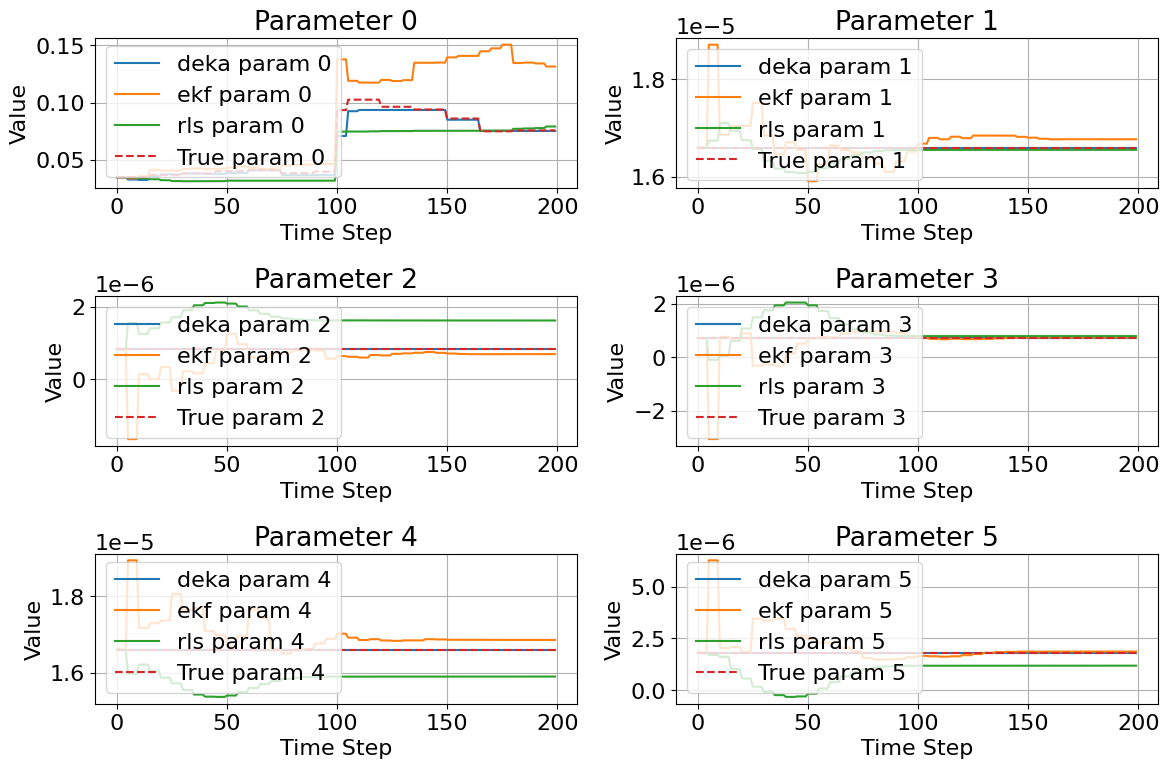

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Assume the following arrays are already defined:
# t: a 1D array for time steps
# theta_hat_deka_array: estimated parameters from DEKA, shape (N, num_params)
# theta_hat_rls_array: estimated parameters from RLS, shape (N, num_params)
# theta_hat_ekf_array: estimated parameters from EKF, shape (N, num_params)
# theta_deka_array: true parameter values, shape (N, num_params)

fig, axs = plt.subplots(4, 2, figsize=(12, 10))
axs = axs.flatten()  # Make it a 1D list of axes for easy iteration

for j in range(6):
    axs[j].plot(t, theta_hat_deka_array[:, j], label=f'deka param {j}')
    axs[j].plot(t, theta_hat_ekf_array[:, j], label=f'ekf param {j}')
    axs[j].plot(t, theta_hat_rls_array[:, j], label=f'rls param {j}')
    axs[j].plot(t, theta_deka_array[:, j], '--', label=f'True param {j}')
    axs[j].set_title(f'Parameter {j}')
    axs[j].set_xlabel('Time Step')
    axs[j].set_ylabel('Value')
    axs[j].legend()
    axs[j].grid(True)

# Hide the 8th subplot if you only have 7 params
axs[-1].set_visible(False)
axs[-2].set_visible(False)


plt.tight_layout()
plt.show()


## Simulate 1000 times to obtain average mse comparison 

In [9]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [10]:
import numpy as np
import joblib
from tqdm import tqdm
from param_est import OnlineParamEst

# Initialize parameter estimation class
param_est = OnlineParamEst()

num_runs = 1000

# Function to add random diagonal noise
def add_random_10pct_variance_diag(mat_nominal, std_dev=0.1):
    diag_base = np.diag(mat_nominal)
    alpha = np.random.randn(len(diag_base)) * std_dev  # Random scale factors
    diag_scaled = diag_base * (1.0 + alpha)
    return np.diag(diag_scaled)

# Function to run a single simulation instance
def run_simulation(run_idx):
    # Generate noisy Q and R
    Q_noise = add_random_10pct_variance_diag(Q, std_dev=0.1)
    R_noise = add_random_10pct_variance_diag(R, std_dev=0.1)

    # Run simulations
    x_kf, u_kf, theta_kf, theta_hat_kf = param_est.simulate_quadrotor_hover_with_KF(Q_noise, R_noise)
    x_deka, u_deka, theta_deka, theta_hat_deka = param_est.simulate_quadrotor_hover_with_DEKA()
    x_rls, u_rls, theta_rls, theta_hat_rls = param_est.simulate_quadrotor_hover_with_RLS()

    # Convert lists to arrays
    theta_deka_array = np.array(theta_deka)
    theta_hat_deka_array = np.array(theta_hat_deka)
    theta_rls_array = np.array(theta_rls)
    theta_hat_rls_array = np.array(theta_hat_rls)
    theta_kf_array = np.array(theta_kf)
    theta_hat_kf_array = np.array(theta_hat_kf)

    # Compute MSE for each method
    mse_deka_perturbed = np.mean((theta_hat_deka_array[:,0] - theta_deka_array[:,0])**2)
    mse_deka_unperturbed = np.mean((theta_hat_deka_array[:,1:] - theta_deka_array[:,1:])**2)
    mse_rls_perturbed = np.mean((theta_hat_rls_array[:,0] - theta_rls_array[:,0])**2)
    mse_rls_unperturbed = np.mean((theta_hat_rls_array[:,1:] - theta_rls_array[:,1:])**2)
    mse_kf_perturbed = np.mean((theta_hat_kf_array[:,0] - theta_kf_array[:,0])**2)
    mse_kf_unperturbed = np.mean((theta_hat_kf_array[:,1:] - theta_kf_array[:,1:])**2)

    return (mse_deka_perturbed, mse_deka_unperturbed, mse_rls_perturbed, 
            mse_rls_unperturbed, mse_kf_perturbed, mse_kf_unperturbed)

# Set up matrices
Q = 1e-6 * np.eye(7)
R = 1e-4 * np.eye(6 * 10)

# Run simulations in parallel
results = joblib.Parallel(n_jobs=-1)(
    joblib.delayed(run_simulation)(run_idx) for run_idx in tqdm(range(num_runs))
)

# Unpack results
mse_deka_perturbed_list, mse_deka_unperturbed_list, mse_rls_perturbed_list, \
mse_rls_unperturbed_list, mse_kf_perturbed_list, mse_kf_unperturbed_list = zip(*results)

# Compute average MSE after parallel runs
avg_mse_deka_perturbed = np.mean(mse_deka_perturbed_list)
avg_mse_deka_unperturbed = np.mean(mse_deka_unperturbed_list)
avg_mse_rls_perturbed = np.mean(mse_rls_perturbed_list)
avg_mse_rls_unperturbed = np.mean(mse_rls_unperturbed_list)
avg_mse_kf_perturbed = np.mean(mse_kf_perturbed_list)
avg_mse_kf_unperturbed = np.mean(mse_kf_unperturbed_list)

# Print results
print(f"Average MSE DEKA (perturbed): {avg_mse_deka_perturbed}")
print(f"Average MSE DEKA (unperturbed): {avg_mse_deka_unperturbed}")
print(f"Average MSE RLS (perturbed): {avg_mse_rls_perturbed}")
print(f"Average MSE RLS (unperturbed): {avg_mse_rls_unperturbed}")
print(f"Average MSE KF (perturbed): {avg_mse_kf_perturbed}")
print(f"Average MSE KF (unperturbed): {avg_mse_kf_unperturbed}")


100%|██████████| 1000/1000 [27:52<00:00,  1.67s/it]


Average MSE DEKA (perturbed): 4.1608420469729054e-05
Average MSE DEKA (unperturbed): 1.1194288352241742e-41
Average MSE RLS (perturbed): 0.00012303474474683528
Average MSE RLS (unperturbed): 9.764021594807978e-12
Average MSE KF (perturbed): 0.0001853393021226756
Average MSE KF (unperturbed): 7.16429017235824e-12
